<a href="https://colab.research.google.com/github/Kasrakko/PyTorch-Deep-Learning/blob/main/NN_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import torch 
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'1.13.1+cu116'

***What we are doing here is:***

1. data (prepare and load)
2. building model
3. fitting the model to data (training)
4. making prediction and evaluting model (inference)
5. saving and loading a model
6. putting it all together

## Data preparing and loading

Data can be anythings 
* Excel sheets 
* Image of any kind
* Audio
* Videos
* Text 
* DNA
* etc

Machin learning is a game oftwo parts:
1. Get data into a numerical representation.
2. Build a model to learn pattern in that numerical representation 

To showcase this, lets create some *known* data using the linear regrrion formula.

### Get data into a numerical representation

In [63]:
# create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # Inputs
y = weight * X + bias # Outputs

print(f"this is our X:\n{X.squeeze()}\n\n \t\t\t\t And the len(X)={len(X)}\n And here is the first 10 of X:\n{X[:10]}")
print(f"this is our y:\n{y.squeeze()}\n\n \t\t\t\t And the len(y)={len(y)}\n And here is the first 10 of y:\n{y[:10]}")

this is our X:
tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

 				 And the len(X)=50
 And here is the first 10 of X:
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
this is our y:
tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
        0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
        0.6780, 0.6920, 0.7060, 0.7200, 0.7

### Spliting datasets to training and test sets

In [64]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize data

In [65]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  "\n Plots training data, test data and compares predictions."
  plt.figure(figsize=(10, 7))

#plot trainig data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

# plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

# Are there predictions?
  if predictions is not None:
  # plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
    plt.legend(prop={"size" : 14});

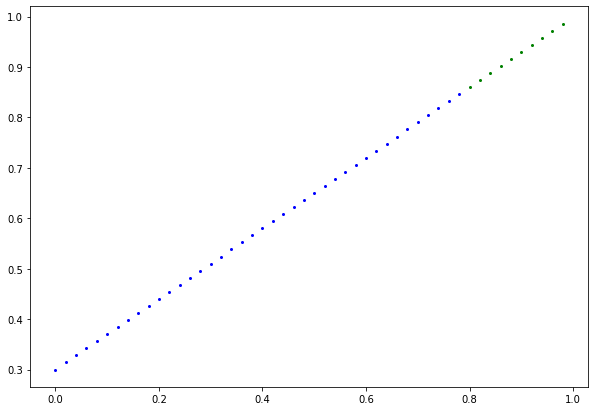

In [66]:
plot_predictions();

## Build model

In [67]:
# Build model
# Create a linear regrresion model
class LinearReggresionModel(nn.Module): # Almost everything in Pytorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # Starts with random weight and try to adjust it to the ideal weight     
                                          dtype=torch.float)#pyTorch loves the data typpe torch.float32
                                          ,requires_grad=True) # Can this parameter update via gradiant descent
    self.bias = nn.Parameter(torch.randn(1, # Starts with random weight and try to adjust it to the ideal weight     
                                          dtype=torch.float)#pyTorch loves the data typpe torch.float32
                                          ,requires_grad=True) # Can this parameter update via gradiant descent
  
  # Forward methde
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is input data
    return self.weights * x + self.bias # Linear regrression formula

In [ ]:
## Build model
## Create a linear regrresion model
#class LinearReggresionModel(nn.Module): # Almost everything in Pytorch inherits from nn.module
#  def __init__(self):
#    super().__init__()
#    # Use nn.Linear() for creating the model parameter, also called leanr transform 
#    self.linear_layer = nn.Linear(in_features=1,
##                                  out_features=1)
#  # Forward methde
#  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is input data
#    return self.linear_layer(x)

### pyTorch model building essentials

* `nn.module` -> contains all the building for computational graph

* `torch.nn.parameter` -> what parameter should our model try and learn, often a pytorch layer from torch.nn

* `torch.nn.module`-> the class for all NN modules, if subclass it, you should overwrite forward()

* `torch.optim` -> this where the optimizer in pyTorch live, they will helps with gradient descent 

* `def forward()` -> All nn.modules subclases require you to overwrite forward(), this method defines what happens in the forward computation

 ### Checking the contests of our pyTorch model

In [68]:
# Create a random seed
torch.manual_seed(42)
#  Create an instance of the model ( this is a subclass of nn.Module)

model_0 = LinearReggresionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [69]:
# List named 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inferenece_mode()`

To checkout model predictive model, lets see how well it predicts `y_test` based on `X_test`.

when we pass data through our model, its going to run it through `forward()` method. 

In [70]:
# Make prediction with model without infernrce_mode
y_preds = model_0(X_test)
y_preds, len(y_preds)

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]], grad_fn=<AddBackward0>), 10)

In [71]:
# Make prediction with model with infrence_mode
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

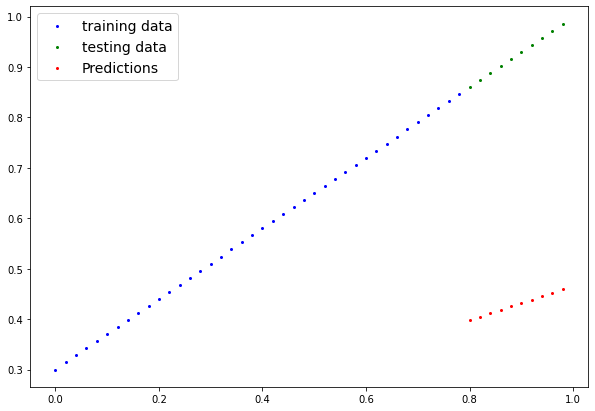

In [72]:
plot_predictions(predictions=y_preds)

## Train model 

Te whole idea of training is for a model to move from some **unknown** parameters (these may be random) to some **known** parameters.

Or in the other word from poor representation of the data to better representation.

One way to messure how poor or how wrong your model oredicts is to use loss function.

THINGS WE NEED TO TRAIN:
* **Loss finction:**  A function to messure how wrong your models oredictions are to the ideal outputs, lower is better.

* **Optimizer:** Take into account the loss of the model and adjust the model's parameters.

And specifically for pyTorch:
* A train loop
* A test loop

In [73]:
 list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [74]:
# Checkout the model parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### los function and optimizer

In [75]:
# MAE_los ==> L1Loss
loss_fn = nn.L1Loss()

# Setup an optimizer  ==> `torch.optim`
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate


### Training loop

A couple of things we need in training loop:

1. Loop through te data
2. Forward pass (this involves data moving through our model's `forward()` functions)
3. Calculate the loss (compare forward pass predictionsto ground truth labeles) ***{forwardPropagation}***
4. Loss backward (move from output to input to calculate the gradients of each of the parameters of our model to the loss function) ***{backPropagation}***
5. optimizer steps(use the optimizer to adjust our model's parameters to try and improve the loss) ***{gradient descent}***

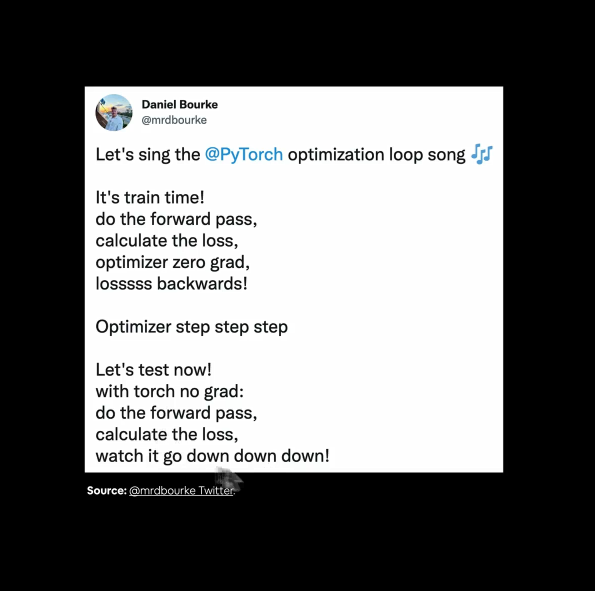

In [76]:
torch.manual_seed(42)

# An epoc is one loop through the data
epochs = 1000

# Tracking diffrent model
epoch_count = []
loss_values = []
test_loss_values = []

## Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in pyTorch sets all parameters require gradient to require gradient
  
# 1. Forward pass
  y_pred = model_0(X_train)

# 2. Loss function
  loss = loss_fn(y_pred, y_train)
  print(f"Train_loss = {loss}")

# 3. optimizer 
  optimizer.zero_grad()

# 4. Perform backPropagation on the loss with respect to parameters of the model
  loss.backward()

# 5. Step the optimizer (Perform the gradient descent)
  optimizer.step() # by defualt how the optimizer changes will acculmate the loop. so, we have them above in step 3 for the next ireration of the loop.

  ### Testing 
  model_0.eval() # turns off gradient tracking
  with torch.inference_mode(): # turns off the grafient descent
    # 1. Do the forward pass
    test_pred = model_0(X_test)
    
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  
  # Print what happenin:
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss : {test_loss}\n")

    # Print our model_0.state_dict()
    print(model_0.state_dict())

Train_loss = 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss : 0.48106518387794495

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Train_loss = 0.3013603389263153
Train_loss = 0.28983935713768005
Train_loss = 0.2783183455467224
Train_loss = 0.26679736375808716
Train_loss = 0.2552763521671295
Train_loss = 0.24375534057617188
Train_loss = 0.23223432898521423
Train_loss = 0.22071333229541779
Train_loss = 0.20919232070446014
Train_loss = 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss : 0.3463551998138428

OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Train_loss = 0.18615034222602844
Train_loss = 0.1746293306350708
Train_loss = 0.16310831904411316
Train_loss = 0.1515873372554779
Train_loss = 0.14006635546684265
Train_loss = 0.1285453587770462
Train_loss = 0.11702437698841095
Train_loss = 0.1060912236571312
Train_loss = 0.09681284427642822
Train_loss = 0.08908725529909134
Epoch: 20 | Loss: 0.089087

In [77]:
test_loss, loss

(tensor(0.0084), tensor(0.0026, grad_fn=<MeanBackward0>))

In [78]:
weight, bias

(0.7, 0.3)

In [90]:
epoch_count

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 610,
 620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990]

In [80]:
# Make them numPy array 
loss_values_array = np.array(torch.tensor(loss_values).cpu().numpy())
loss_values_array

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893

In [81]:
# Make them numPy array 
test_loss_values_array = np.array(torch.tensor(test_loss_values).cpu().numpy())
test_loss_values_array

array([0.48106518, 0.3463552 , 0.2172966 , 0.14464018, 0.11360953,
       0.09919948, 0.08886633, 0.08059376, 0.07232123, 0.06473556,
       0.05646304, 0.0481905 , 0.04060482, 0.03233228, 0.02405975,
       0.01647409, 0.00820156, 0.00502309, 0.00502309, 0.00502309,
       0.00502309, 0.00502309, 0.00502309, 0.00502309, 0.00502309,
       0.00502309, 0.00502309, 0.00502309, 0.00502309, 0.00502309,
       0.00502309, 0.00502309, 0.00502309, 0.00502309, 0.00502309,
       0.00502309, 0.00502309, 0.00502309, 0.00502309, 0.00502309,
       0.00502309, 0.00502309, 0.00502309, 0.00502309, 0.00502309,
       0.00502309, 0.00502309, 0.00502309, 0.00502309, 0.00502309,
       0.00502309, 0.00502309, 0.00502309, 0.00502309, 0.00502309,
       0.00502309, 0.00502309, 0.00502309, 0.00502309, 0.00502309,
       0.00502309, 0.00502309, 0.00502309, 0.00502309, 0.00502309,
       0.00502309, 0.00502309, 0.00502309, 0.00502309, 0.00502309,
       0.00502309, 0.00502309, 0.00502309, 0.00502309, 0.00502

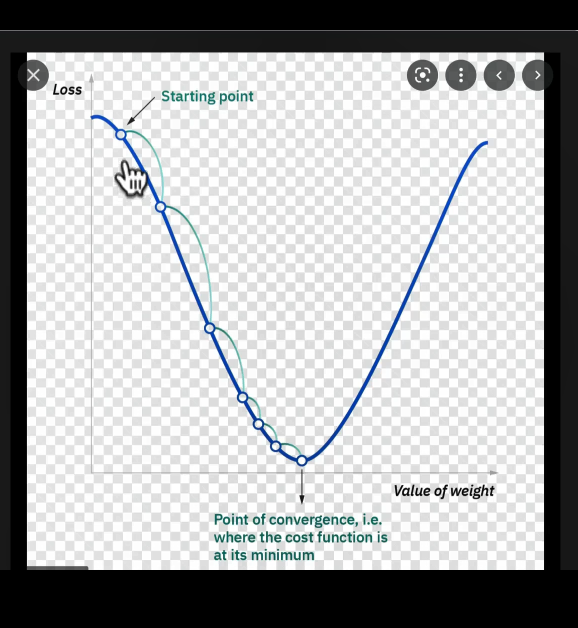

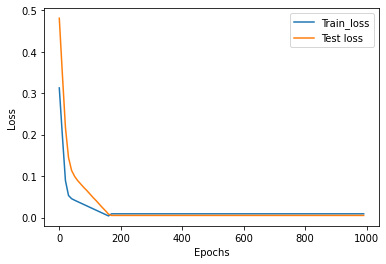

In [82]:
plt.plot(epoch_count, loss_values_array, label="Train_loss")
plt.plot(epoch_count, test_loss_values_array, label="Test loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [83]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)


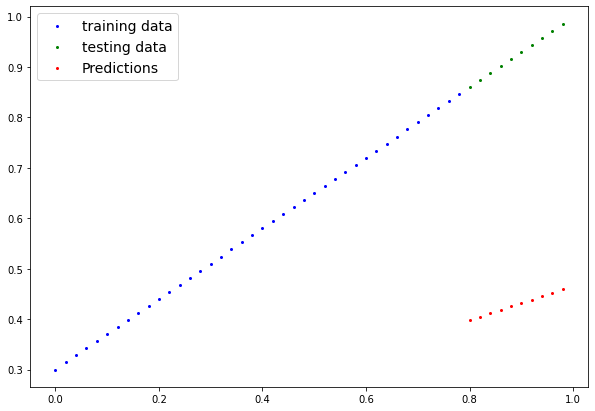

In [84]:
plot_predictions(predictions=y_preds)

In [85]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

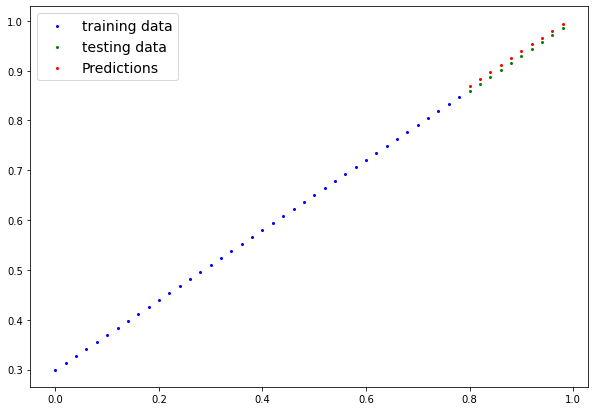

In [86]:
plot_predictions(predictions=y_preds_new)

## Save  model in pyTorch

In [97]:
# Saving our pyTorch model
from pathlib import Path    # "P" must be capital

# 1. Create model directory
MODEL_PATH = Path("models") # "P" must be capital
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "NN_01.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/NN_01.pth


## Load our pyTorch model

In [99]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [100]:
# To load in a saved state_dict we have to instantiate a new model of our model
loaded_model_0 = LinearReggresionModel()

# Load the saved state_dict of the model_0 (this will update the new instance with update parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [103]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [104]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [109]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
  
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [110]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])